In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
ID = pd.read_csv("Data_Master_2.csv")
ID.info()

ID_train = ID[ID['Date'] <= 405]
ID_test = ID[ID['Date'] > 405]

len(ID_train), len(ID_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dates                              507 non-null    object 
 1   Date                               507 non-null    int64  
 2   Bitcoin_Volume                     507 non-null    float64
 3   Bitcoin_Price                      507 non-null    float64
 4   Bitcoin_Price_Close                507 non-null    float64
 5   Bitcoin_Price_Previous_Day_Open    507 non-null    float64
 6   Bitcoin_Price_One_Week_Prior_Open  507 non-null    float64
 7   Ethereum_Price                     507 non-null    float64
 8   Doge_Price                         507 non-null    float64
 9   Litecoin_Price                     507 non-null    float64
 10  SP500                              507 non-null    float64
 11  UST_1Y_Maturity                    507 non-null    float64

(405, 102)

## Model 1

In [4]:
import statsmodels.formula.api as smf

logreg1 = smf.logit(formula = 'BTC_Price_Movement_ID_10 ~ Bitcoin_Price_Previous_Day_Open + Bitcoin_Price_One_Week_Prior_Open + Ethereum_Price + Doge_Price + Litecoin_Price + SP500 + UST_1Y_Maturity + UST_10Y_Maturity + Crude_Oil + Gold + Copper + Corn + Singapore_Dollar + Euro + All_Twitter_Posts + Positive_Tweets + Negative_Tweet + Neutral_Tweets + Tweet_Average_Sentiment + News_Article_Count + News_Sentiment + Crypto_Global_Ranking',
                   data = ID_train).fit()
print(logreg1.summary())

Optimization terminated successfully.
         Current function value: 0.628473
         Iterations 6
                              Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_ID_10   No. Observations:                  405
Model:                                Logit   Df Residuals:                      382
Method:                                 MLE   Df Model:                           22
Date:                      Thu, 27 Apr 2023   Pseudo R-squ.:                 0.09186
Time:                              00:51:01   Log-Likelihood:                -254.53
converged:                             True   LL-Null:                       -280.28
Covariance Type:                  nonrobust   LLR p-value:                 0.0003669
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept     

## Model 2 Removing Copper and Doge Price

In [5]:
logreg2 = smf.logit(formula = 'BTC_Price_Movement_ID_10 ~ Bitcoin_Price_Previous_Day_Open + Bitcoin_Price_One_Week_Prior_Open + Ethereum_Price + Litecoin_Price + SP500 + UST_1Y_Maturity + UST_10Y_Maturity + Crude_Oil + Gold + Corn + Singapore_Dollar + Euro + All_Twitter_Posts + Positive_Tweets + Negative_Tweet + Neutral_Tweets + Tweet_Average_Sentiment + News_Article_Count + News_Sentiment + Crypto_Global_Ranking',
                   data = ID_train).fit()
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.628503
         Iterations 6
                              Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_ID_10   No. Observations:                  405
Model:                                Logit   Df Residuals:                      384
Method:                                 MLE   Df Model:                           20
Date:                      Thu, 27 Apr 2023   Pseudo R-squ.:                 0.09182
Time:                              00:51:03   Log-Likelihood:                -254.54
converged:                             True   LL-Null:                       -280.28
Covariance Type:                  nonrobust   LLR p-value:                 0.0001360
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept     

## Model 3 Removing Crude_Oil  and News_Sentiment

In [6]:
logreg3 = smf.logit(formula = 'BTC_Price_Movement_ID_10 ~ Bitcoin_Price_Previous_Day_Open + Bitcoin_Price_One_Week_Prior_Open + Ethereum_Price + Litecoin_Price + SP500 + UST_1Y_Maturity + UST_10Y_Maturity + Gold + Corn + Singapore_Dollar + Euro + All_Twitter_Posts + Positive_Tweets + Negative_Tweet + Neutral_Tweets + Tweet_Average_Sentiment + News_Article_Count + Crypto_Global_Ranking',
                   data = ID_train).fit()
print(logreg3.summary())

Optimization terminated successfully.
         Current function value: 0.628610
         Iterations 6
                              Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_ID_10   No. Observations:                  405
Model:                                Logit   Df Residuals:                      386
Method:                                 MLE   Df Model:                           18
Date:                      Thu, 27 Apr 2023   Pseudo R-squ.:                 0.09167
Time:                              00:51:04   Log-Likelihood:                -254.59
converged:                             True   LL-Null:                       -280.28
Covariance Type:                  nonrobust   LLR p-value:                 4.650e-05
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept     

## Model 4 Removing Gold, Singapore_Dollar, and Negative_Tweet

In [7]:
logreg4 = smf.logit(formula = 'BTC_Price_Movement_ID_10 ~ Bitcoin_Price_Previous_Day_Open + Bitcoin_Price_One_Week_Prior_Open + Ethereum_Price + Litecoin_Price + SP500 + UST_1Y_Maturity + UST_10Y_Maturity + Corn + Euro + All_Twitter_Posts + Positive_Tweets + Neutral_Tweets + Tweet_Average_Sentiment + News_Article_Count + Crypto_Global_Ranking',
                   data = ID_train).fit()
print(logreg4.summary())

Optimization terminated successfully.
         Current function value: 0.629443
         Iterations 6
                              Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_ID_10   No. Observations:                  405
Model:                                Logit   Df Residuals:                      389
Method:                                 MLE   Df Model:                           15
Date:                      Thu, 27 Apr 2023   Pseudo R-squ.:                 0.09046
Time:                              00:51:05   Log-Likelihood:                -254.92
converged:                             True   LL-Null:                       -280.28
Covariance Type:                  nonrobust   LLR p-value:                 9.218e-06
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept     

## Model 5 Removing Crypto_Global_Ranking 

In [8]:
logreg5 = smf.logit(formula = 'BTC_Price_Movement_ID_10 ~ Bitcoin_Price_Previous_Day_Open + Bitcoin_Price_One_Week_Prior_Open + Ethereum_Price + Litecoin_Price + SP500 + UST_1Y_Maturity + UST_10Y_Maturity + Corn + Euro + All_Twitter_Posts + Positive_Tweets + Neutral_Tweets + Tweet_Average_Sentiment + News_Article_Count',
                   data = ID_train).fit()
print(logreg5.summary())

Optimization terminated successfully.
         Current function value: 0.630121
         Iterations 6
                              Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_ID_10   No. Observations:                  405
Model:                                Logit   Df Residuals:                      390
Method:                                 MLE   Df Model:                           14
Date:                      Thu, 27 Apr 2023   Pseudo R-squ.:                 0.08948
Time:                              00:51:06   Log-Likelihood:                -255.20
converged:                             True   LL-Null:                       -280.28
Covariance Type:                  nonrobust   LLR p-value:                 5.742e-06
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept     

## Model 6 Removing Corn

In [9]:
logreg6 = smf.logit(formula = 'BTC_Price_Movement_ID_10 ~ Bitcoin_Price_Previous_Day_Open + Bitcoin_Price_One_Week_Prior_Open + Ethereum_Price + Litecoin_Price + SP500 + UST_1Y_Maturity + UST_10Y_Maturity + Euro + All_Twitter_Posts + Positive_Tweets + Neutral_Tweets + Tweet_Average_Sentiment + News_Article_Count',
                   data = ID_train).fit()
print(logreg6.summary())

Optimization terminated successfully.
         Current function value: 0.630888
         Iterations 6
                              Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_ID_10   No. Observations:                  405
Model:                                Logit   Df Residuals:                      391
Method:                                 MLE   Df Model:                           13
Date:                      Thu, 27 Apr 2023   Pseudo R-squ.:                 0.08837
Time:                              00:51:07   Log-Likelihood:                -255.51
converged:                             True   LL-Null:                       -280.28
Covariance Type:                  nonrobust   LLR p-value:                 3.577e-06
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept     

## Model 7 Removing News_Article_Count

In [10]:
logreg7 = smf.logit(formula = 'BTC_Price_Movement_ID_10 ~ Bitcoin_Price_Previous_Day_Open + Bitcoin_Price_One_Week_Prior_Open + Ethereum_Price + Litecoin_Price + SP500 + UST_1Y_Maturity + UST_10Y_Maturity + Euro + All_Twitter_Posts + Positive_Tweets + Neutral_Tweets + Tweet_Average_Sentiment',
                   data = ID_train).fit()
print(logreg7.summary())

Optimization terminated successfully.
         Current function value: 0.631447
         Iterations 6
                              Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_ID_10   No. Observations:                  405
Model:                                Logit   Df Residuals:                      392
Method:                                 MLE   Df Model:                           12
Date:                      Thu, 27 Apr 2023   Pseudo R-squ.:                 0.08756
Time:                              00:51:08   Log-Likelihood:                -255.74
converged:                             True   LL-Null:                       -280.28
Covariance Type:                  nonrobust   LLR p-value:                 2.021e-06
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept     

In [11]:
logreg8 = smf.logit(formula = 'BTC_Price_Movement_ID_10 ~ Bitcoin_Price_Previous_Day_Open + Litecoin_Price + SP500 + UST_1Y_Maturity + UST_10Y_Maturity + Euro + All_Twitter_Posts + Positive_Tweets + Neutral_Tweets',
                   data = ID_train).fit()
print(logreg8.summary())

Optimization terminated successfully.
         Current function value: 0.635994
         Iterations 6
                              Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_ID_10   No. Observations:                  405
Model:                                Logit   Df Residuals:                      395
Method:                                 MLE   Df Model:                            9
Date:                      Thu, 27 Apr 2023   Pseudo R-squ.:                 0.08099
Time:                              00:51:10   Log-Likelihood:                -257.58
converged:                             True   LL-Null:                       -280.28
Covariance Type:                  nonrobust   LLR p-value:                 7.773e-07
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept         

In [12]:
y_prob = logreg8.predict(ID_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)
y_test = ID_test['BTC_Price_Movement_ID_10']
y_pred

405    0
406    0
407    0
408    1
409    0
      ..
502    0
503    0
504    0
505    0
506    0
Length: 102, dtype: int64

In [13]:
def mae(x_tr, x_pr):
    diff = x_tr - x_pr
    return np.mean(np.abs(diff))

mse = mae(y_test, y_pred)
print("Mean Square Error:", mse)

Mean Square Error: 0.4411764705882353


In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[51  2]
 [43  6]]


In [15]:
(cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())  # T/total = (TP+TN)/total

0.5588235294117647

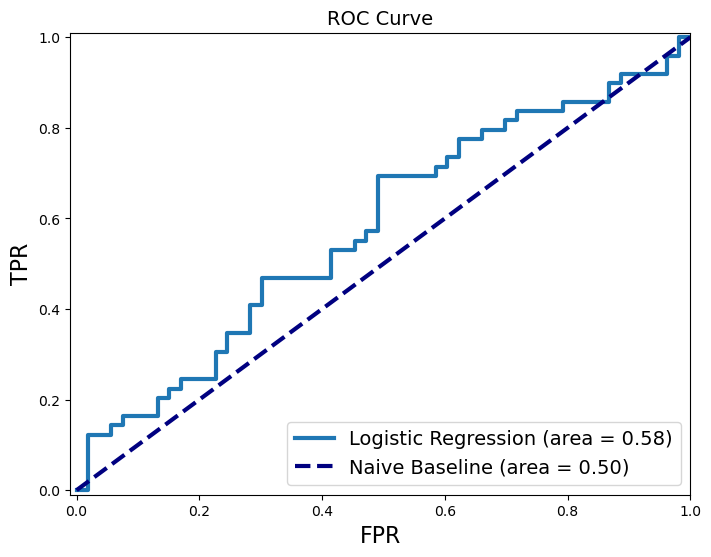

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=14)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()